# #0 Critique the most important figure from a seminal paper in your field

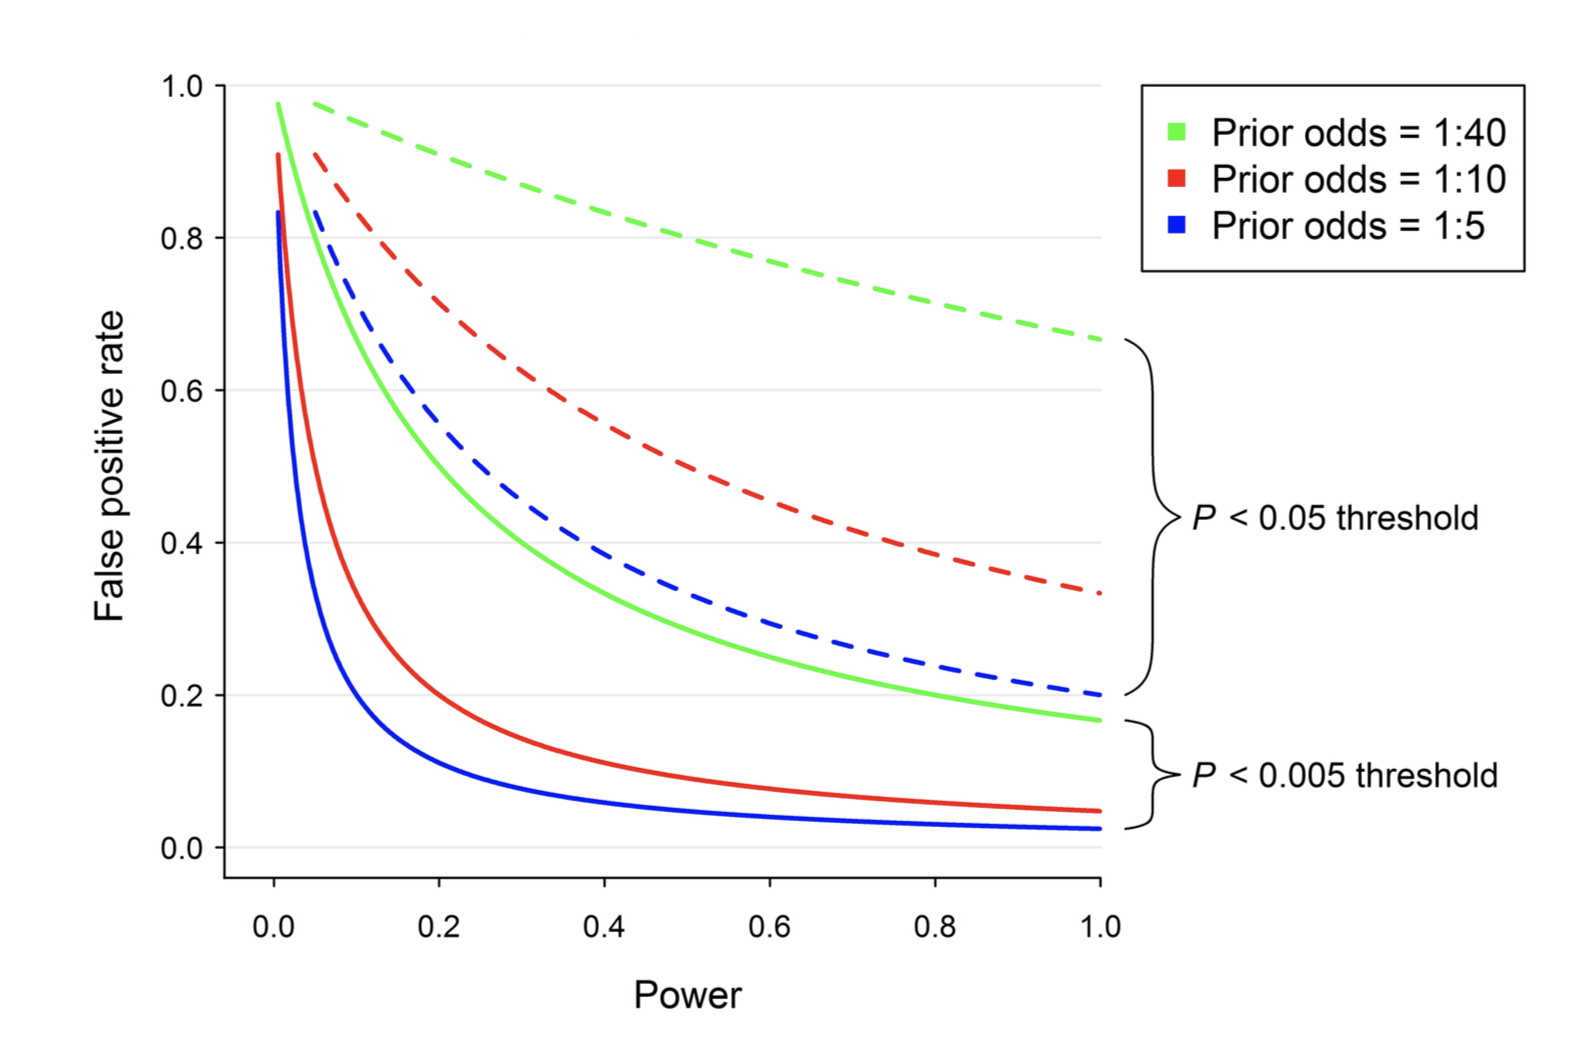

In [121]:
from IPython.display import Image, display
display(Image(filename='hw_2_data/p_value_drop.png', embed=True, width=550))

This figure is used in "Redefine statistical significance", authored by more than 100 scientists from various domains, published on 22 July 2017. The complete story is about how the lack of reproducibility has caused growing concern over the credibility of claims of new discoveries based on “statistically significant” findings. With p=0.05 as the significant value, it yields a much higher rate of false-positives. This figure is trying to deliver three messages:
- In many studies, statistical power is low (referring to "Empirical assessment of published effect sizes and power in the recent cognitive neuroscience and psychology literature", written by D. Szucs, J. P. A. Ioannidis). This figure demonstrates that low statistical power and 𝛼 = 0.05 combine to produce high false positive rates.
- The false positive rate is greater than 33% with prior odds of 1:10 and a P-value threshold of 0.05, regardless of the level of statistical power.
- Empirical evidence from recent replication projects in psychology and experimental economics provide insights into the prior odds in favor of $H_1$

**SIDENOTE**:
  - false positive rate $\approx \frac{\alpha\phi} {(\alpha\phi) + (1 - \beta)(1 + \phi)}$
  - prior odds defined as $\frac{1 - \phi}{\phi} = \frac{Pr(H_1)}{Pr(H_0}$

Good sides:
- clean and concice image, appropriate ammount of annotations
- high resolution with highly-contracted colors/legends
- use of color shade to emphasize changes in different ranges

Critiques:
- xlable/ylable is unclear: no show of relationships across power/fp-rate/p-value
- no explanation of power and what does power do. 
    - This graph depicts false positive rate as a function of power 1 − 𝛽. Can be labelled on the x-axis
- why low false-positive rate matters? and why 0.005 didn't explain.
    - No significant/noticable changes after continuing reducing p-values (<0.005). Can have another 1 or 2 lines portraying that.

# #1 Reproduce one of your old published-paper quality plots with *Bokeh*.

UNFORTUNATELY skipped.

As an undergrad, I don't have any published-paper, nor a plot in that. 
In addition, due to my procrastination, I started this homework on Sunday and I chose not to email Prof./GSI as they were not responsible for being responsive 24/7. 

I would definitely start this week's homework much earlier. 

# #2 Reproduce in *matplotlib* the provided plot *stocks.png*

In [23]:
# Import neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# -*- coding: utf-8 -*-

In [2]:
# Load in data/text
ny_temp = np.loadtxt('hw_2_data/ny_temps.txt', skiprows=1)
google_stock = np.loadtxt('hw_2_data/google_data.txt', skiprows=1)
yahoo_stock = np.loadtxt('hw_2_data/yahoo_data.txt', skiprows=1)

In [3]:
#google_stock

In [4]:
google_stock_date, google_stokc_value = google_stock[:, 0], google_stock[:, 1]
yahoo_stock_date, yahoo_stock_value = yahoo_stock[:, 0], yahoo_stock[:, 1]
ny_temp_date, ny_temp_value = ny_temp[:, 0], ny_temp[:, 1]

In [5]:
#ny_temp_date
#ny_temp_value

In [6]:
from matplotlib.ticker import MultipleLocator

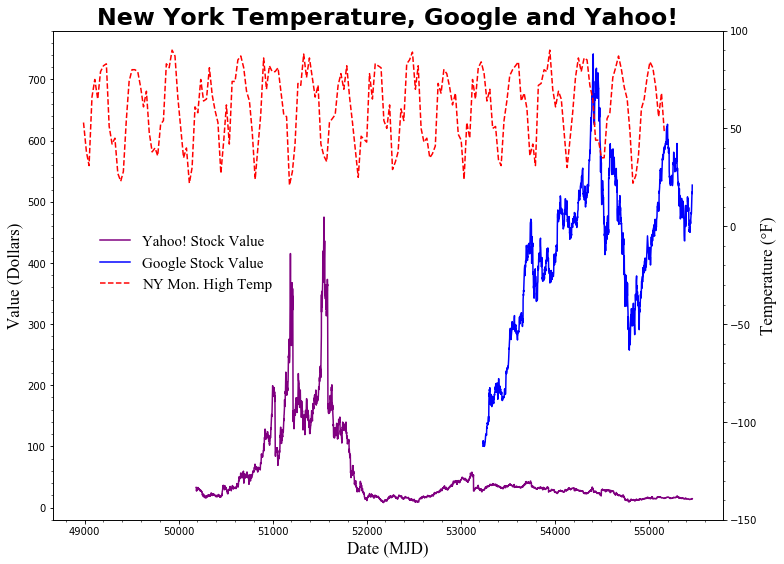

In [118]:
fontsize=17
fig, ax1 = plt.subplots(figsize=[12, 9])

leg1 = ax1.plot(yahoo_stock_date, yahoo_stock_value, 'purple', label='Yahoo! Stock Value')
leg2 = ax1.plot(google_stock_date, google_stokc_value, 'blue', label='Google Stock Value')
ax1.set_xlabel('Date (MJD)', fontsize=fontsize, fontname='Times New Roman')
ax1.set_ylabel('Value (Dollars)', fontsize=fontsize, fontname='Times New Roman')

# set axis label range
ax1.set_ylim([-20, 780])
ax1.set_xlim([49000, 55000])

# add minor ticks
ax1.xaxis.set_minor_locator(MultipleLocator(200))
ax1.yaxis.set_minor_locator(MultipleLocator(20))

# set font for title
font_TNR_notwork = {'family':'Times New Roman', 'color':  'black', 'weight': 1000 , 'size': fontsize*1.85}
# for some reason, if using Times New Roman font, title won't get bolded
font_SS_bold = {'family': 'sans-serif','color':  'black', 'weight': 'bold','size': fontsize*1.4}
ax1.set_title('New York Temperature, Google and Yahoo!', fontdict=font_SS_bold)

# turn off major and minor ticks from upper x axis
ax1.tick_params(axis='x', which='both', top='off')        

ax2 = ax1.twinx()
leg3 = ax2.plot(ny_temp_date, ny_temp_value, 'r--', label='NY Mon. High Temp')
# -*- coding: utf-8 -*-
ax2.set_ylabel('Temperature (°F)', fontsize=fontsize, fontname='Times New Roman')
ax2.set_ylim([-150, 100])
ax2.yaxis.set_minor_locator(MultipleLocator(10))

# add legend
legs = leg1+leg2+leg3
labs = [l.get_label() for l in legs]
legends = ax1.legend(lns, labs, loc= 6, frameon=False, fontsize=15) #fontname="Times New Roman" 

# Get the bounding box of the original legend
bb = legends.get_bbox_to_anchor().inverse_transformed(ax1.transAxes)

# Change to location of the legend. 
Offset = 0.05
bb.x0 += Offset
bb.y0 += Offset
legends.set_bbox_to_anchor(bb, transform = ax1.transAxes)

plt.setp(legends.texts, family='Times New Roman')
plt.show()

**Remaining problems**: 
   - The title (as commented in the code) cannot get bolded when using Times New Roman font. I "stackoverflowed" and checked the matplotlib document a lot but didn't find a solution. Some other people are experiencing, all texts in TNR are bold and cannot get back to regular.
   - The datasets appear to be different from the ones used to generate the provided graph. E.g. Yahoo two peaks both > 400 in the reproduced one, but 1st one is below 400 in the provided.